**Томилов Матвей, 5130901/20103**

### *Упражнение 2.2.*

Необходимо написать класс, наследующийся от Sinusoid из thinkdsp и позволяющий построить пилообразный сигнал - нарастает от -1 до 1, а затем резко падает до -1.

Перепишем функцию *evaluate* так, что:

*cycles* – число циклов со старта

*frac* – дробная часть, растущая от 0 до 1 за период

*unbias* – сдвиг frac - он растет от -0.5 до 0.5

*normalize* – нормализует функцию - она растёт от -self.amp до self.amp

Создадим экземпляр этого класса и получим wave - выведем его часть на экран.

Код и результат его выполнения выглядят так:

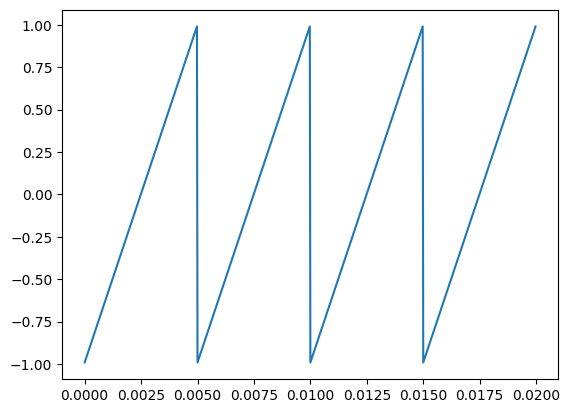

In [55]:
from source_files.thinkdsp import Sinusoid
from source_files.thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

sawtooth = SawtoothSignal(200).make_wave(duration=0.5, framerate=40000)
sawtooth.segment(start=0, duration=0.005 * 4).plot()

Рассмотрим спектр полученного сигнала, выделим наибольшие 10 пиков, чтобы изучить, каким образом частота зависит от амплитуды:

График и массив пиков будут выглядеть таким образом:


[(np.float64(6336.586158412468), np.float64(200.0)),
 (np.float64(3168.5475316442266), np.float64(400.0)),
 (np.float64(2112.647887262727), np.float64(600.0)),
 (np.float64(1584.7831474372117), np.float64(800.0)),
 (np.float64(1268.1325475795675), np.float64(1000.0)),
 (np.float64(1057.0892087347524), np.float64(1200.0)),
 (np.float64(906.3930765164865), np.float64(1400.0)),
 (np.float64(793.414155861169), np.float64(1600.0)),
 (np.float64(705.5802559636873), np.float64(1800.0)),
 (np.float64(635.3480882678592), np.float64(2000.0))]

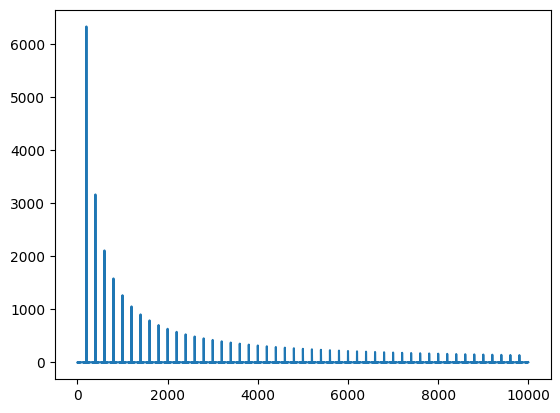

In [56]:
spectrum = sawtooth.make_spectrum()
spectrum.plot(high=10000)
spectrum.peaks()[:10]

Из полученных результатов видно, наш сигнал содержит и чётные, и нечётные гармоники, кратные основной частоте.

Амплитуда гармоник уменьшается пропорционально частоте - 1⁄f.

Теперь сравним полученный спектр пилообразного сигнала со спектром прямоугольного:

Прямоугольный сигнал задаётся с amp=0.5 для корректного сравнения.

Код, полученный график и массив пиков выглядят так:


[(np.float64(6366.413115308202), np.float64(200.0)),
 (np.float64(2122.71230545574), np.float64(600.0)),
 (np.float64(1274.3176165995214), np.float64(1000.0)),
 (np.float64(910.9676790136105), np.float64(1400.0)),
 (np.float64(709.300517302879), np.float64(1800.0)),
 (np.float64(581.1268307194829), np.float64(2200.0)),
 (np.float64(492.5279385053999), np.float64(2600.0)),
 (np.float64(427.6753695820614), np.float64(3000.0)),
 (np.float64(378.18956596178754), np.float64(3400.0)),
 (np.float64(339.2194055744896), np.float64(3800.0))]

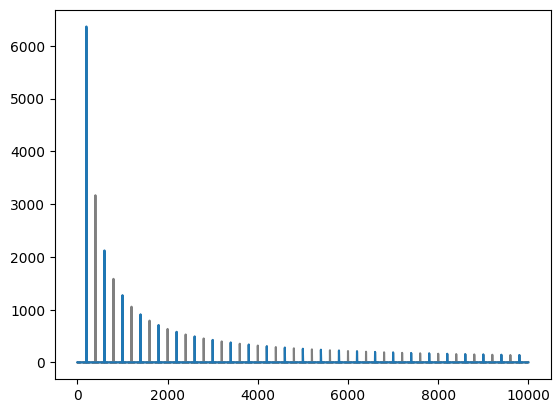

In [57]:
from source_files.thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(high=10000, color='gray')
square = SquareSignal(freq=200, amp=0.5).make_wave(duration=0.5, framerate=40000)
sqere_spectrum = square.make_spectrum()
sqere_spectrum.plot(high=10000)
sqere_spectrum.peaks()[:10]

В отличии от пилообразного сигнала, прямоугольный сигнал имеет только нечетные гармоники, однако зависимость снижения амплитуды от частоты сохраняется - 1⁄f.

По аналогии сравним полученные данные с данными треугольного сигнала:

Треугольный сигнал задаётся с amp=0.78 для корректного сравнения.

Код, полученный график и массив пиков выглядят так:


[(np.float64(6322.961884943854), np.float64(200.0)),
 (np.float64(703.0137709503831), np.float64(600.0)),
 (np.float64(253.4183165242379), np.float64(1000.0)),
 (np.float64(129.55068550436079), np.float64(1400.0)),
 (np.float64(78.57692291999746), np.float64(1800.0)),
 (np.float64(52.77470536760343), np.float64(2200.0)),
 (np.float64(37.935264152507585), np.float64(2600.0)),
 (np.float64(28.625566592556588), np.float64(3000.0)),
 (np.float64(22.404462257168774), np.float64(3400.0)),
 (np.float64(18.043085598456827), np.float64(3800.0))]

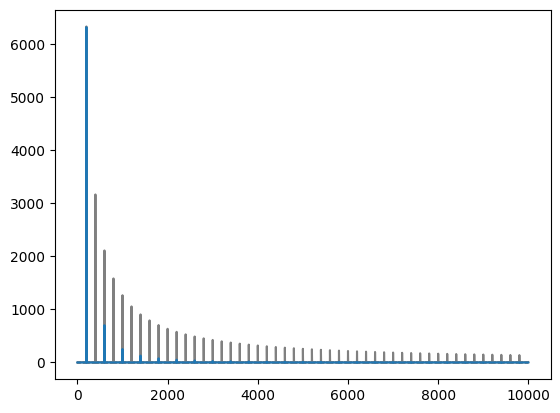

In [58]:
from source_files.thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(high=10000, color='gray')
triangle = TriangleSignal(freq=200, amp=0.78).make_wave(duration=0.5, framerate=40000)
triangle_spectrum = triangle.make_spectrum()
triangle_spectrum.plot(high=10000)
triangle_spectrum.peaks()[:10]

Можно заметить, что треугольный сигнал отличается от представленных ранее - в нём так же, как и в прямоугольном присутствуют только нечётные гармоники, но выделяет его то, что его амплитуда спадает пропорционально квадрату частоты - 1⁄f^2.

### *Упражнение 2.3.*

Необходимо создать прямоугольный сигнал с частотой 1100 Гц и выборкой wave 10000 кадров в секунду.
Отобразим получившийся спектр, а также первые 10 пиков:


[(np.float64(3183.622520909763), np.float64(1100.0)),
 (np.float64(1062.6053796283113), np.float64(3300.0)),
 (np.float64(639.2453221499661), np.float64(4500.0)),
 (np.float64(458.4143857027373), np.float64(2300.0)),
 (np.float64(358.4343652372162), np.float64(100.0)),
 (np.float64(295.21347928093405), np.float64(2100.0)),
 (np.float64(251.79536983103486), np.float64(4300.0)),
 (np.float64(220.26892645852666), np.float64(3500.0)),
 (np.float64(196.44766988672487), np.float64(1300.0)),
 (np.float64(177.9095485479868), np.float64(900.0))]

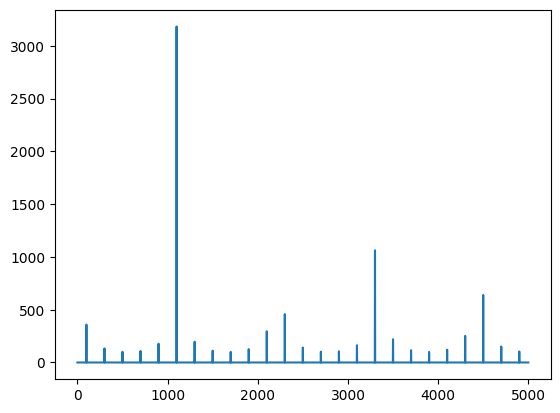

In [59]:
from source_files.thinkdsp import SquareSignal

square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)
square_spectrum = square.make_spectrum()
square_spectrum.plot()
square_spectrum.peaks()[:10]

В предыдущем пункте работы мы выяснили, что, прямоугольный сигнал имеет только нечетные гармоники, а зависимость падения амплитуды от частоты пропорциональна 1⁄f.

Тогда, ожидаем увидеть гармоники на 3300, 5500, 7700 и 9900 Гц.
Пики и правда есть на 1100 и 3300 Гц, однако дальше наблюдается эффект *биения* - вместо 5500 получаем 4500 (10000 – 5500), а следующая гармоника - вместо 7700 получается 2300 (10000 – 7700).

Как следствие, сигнал звучит совершенно не так, как задумывалось - появляются лишние низкие частоты (100), посторонние не кратные частоты (2300), которые сильно выбиваются.

Для демонстрации создадим аудиофайл исходного прямоугольного сигнала и две синусоиды на 2300 и 100 Гц и убедимся, что они достаточно заметны:
*(Осторожно, резкий звук)*

In [60]:
square.make_audio()

In [61]:
from source_files.thinkdsp import SinSignal

SinSignal(2300).make_wave(duration=0.5, framerate=10000).make_audio()

In [62]:
SinSignal(100).make_wave(duration=0.5, framerate=10000).make_audio()

Как и ожидалось, выделенные частоты очень искажают исходны сигнал

### *Упражнение 2.4.*

Создадим треугольный сигнал с частотой 400 Гц и wave длительностью  0.01.

График выглядит следующим образом:


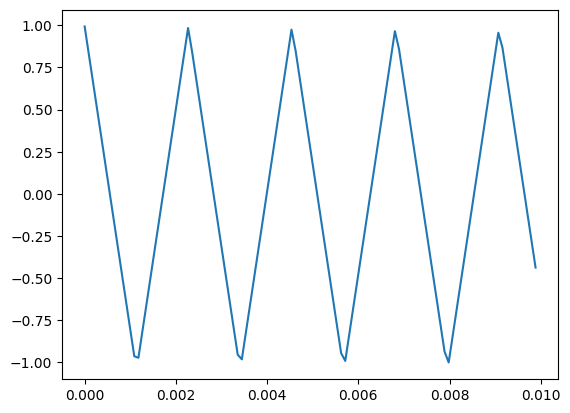

In [63]:
from source_files.thinkdsp import TriangleSignal

triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()

Получим спектр этого сигнала и выведем первый элемент массива hs, который является результатом БПФ.

Результат примерно равен нулю:


In [64]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

np.complex128(1.0436096431476471e-14+0j)

Заменим его значение на 100 повторим вычисление.

Получаем следующий график:


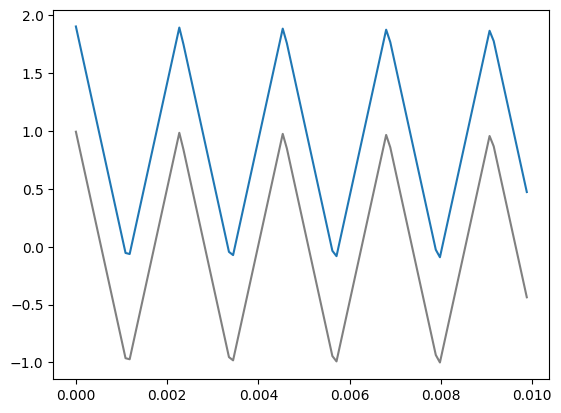

In [65]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

 Из полученного графика видно, компоненте Spectrum.hs[0] мы самостоятельно задали значение, и получившийся сигнал отличается от исходного только вертикальным смещением.

### *Упражнение 2.5.*
Необходимо написать функцию filter_spectrum, которая принимает спектр и изменяет его делением каждого элемента hs на соответствующую частоту из fs.

Получившийся код и его результат представлены ниже:

In [66]:
from source_files.thinkdsp import TriangleSignal

def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0


Для сравнения создадим пилообразный сигнал и выведем его в виде аудио. Далее вызовем функцию фильтрации.

Ниже представлени спектрограмма и аудиофайл "До" и "После" фильтрации:

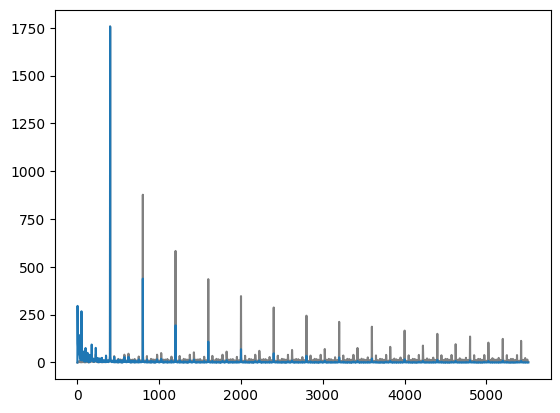

In [67]:
wave = SawtoothSignal(freq=400).make_wave(duration=0.5)
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(400)
spectrum.plot(high=10000)

In [68]:
wave.make_audio()

In [69]:
filtered = spectrum.make_wave()
filtered.make_audio()

Исходя из результатов, делаем вывод: чем больше частота, тем меньше пик после использования функции, т.к. деление происходит именно на частоту.

По "выходу" фукция фильтрации схожа с low_pass, что слышно на аудиозаписи.


### *Упражнение 2.6.*
Необходимо создать сигнал, в котором есть и четные, и нечетные гармоники, спадающие пропорционально 1⁄f^2.

Попробуем собрать необходимый сигнал из нескольких синусоид: частоты будут изменяться в пределах от 600 до 9000 Гц с шагом 600, а амплитуда по заданию вычисляется путем деления 1⁄f^2.

Получившийся код и его результат представлены ниже:

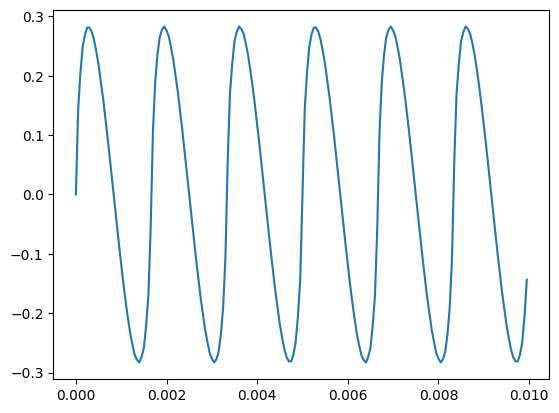

In [70]:
from source_files.thinkdsp import SinSignal
import numpy as np

freqs = np.arange(600, 9600, 600)
amps = (1 / freqs**2) * 10 ** 5
signal = sum(SinSignal(freq, amp) for freq, amp in zip(freqs, amps))
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.segment(duration=0.01).plot()
wave.make_audio()

Чтобф убедиться, что полученный сигнал соответствует требованиям, выведем его спектрограмму и массив первых 10 пиков сигнала:


[(np.float64(1388.8888888888887), np.float64(600.0)),
 (np.float64(347.2222222222215), np.float64(1200.0)),
 (np.float64(154.32098765432173), np.float64(1800.0)),
 (np.float64(86.80555555555657), np.float64(2400.0)),
 (np.float64(55.555555555555244), np.float64(3000.0)),
 (np.float64(38.580246913579764), np.float64(3600.0)),
 (np.float64(28.344671201814904), np.float64(4200.0)),
 (np.float64(21.701388888888054), np.float64(4800.0)),
 (np.float64(17.146776406033567), np.float64(5400.0)),
 (np.float64(13.888888888888896), np.float64(6000.0))]

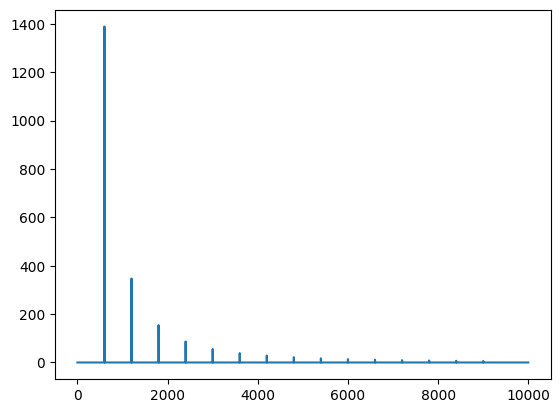

In [71]:
spectrum = wave.make_spectrum()
spectrum.plot()
spectrum.peaks()[:10]

Как видно из полученных результатов, составленный сигнал соответствует требования задания.